In [1]:
import MetaTrader5 as mt5
import sys
import pandas as pd
import pickle
from pandas.plotting import register_matplotlib_converters

from datetime import datetime
# account details
import matplotlib.pyplot as plt
register_matplotlib_converters()


In [2]:
import json

account={}
with open('__user.json') as f:
    account = json.load(f)


# Head

In [4]:
if not mt5.initialize(login=account["login"], server=account['server'],password=account['password']):
    print("\n Authorization fail \n\ninitialize() failed, error code =",mt5.last_error())
    quit()
else:
    print("\n Success Authorization \n")


 Success Authorization 



In [5]:
# request 1000 ticks from EURAUD
euraud_ticks = mt5.copy_ticks_from("EURAUD", datetime(2020,1,28,13), 1000, mt5.COPY_TICKS_ALL)
# request ticks from AUDUSD within 2019.04.01 13:00 - 2019.04.02 13:00
audusd_ticks = mt5.copy_ticks_range("AUDUSD", datetime(2020,1,27,13), datetime(2020,1,28,13), mt5.COPY_TICKS_ALL)
 
# get bars from different symbols in a number of ways
eurusd_rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime(2020,1,28,13), 1000)
eurgbp_rates = mt5.copy_rates_from_pos("EURGBP", mt5.TIMEFRAME_M1, 0, 1000)
eurcad_rates = mt5.copy_rates_range("EURCAD", mt5.TIMEFRAME_M1, datetime(2020,1,27,13), datetime(2020,1,28,13))
 
# shut down connection to MetaTrader 5

 
#DATA
print('euraud_ticks(', len(euraud_ticks), ')')
for val in euraud_ticks[:10]: print(val)
 
print('audusd_ticks(', len(audusd_ticks), ')')
for val in audusd_ticks[:10]: print(val)
 

print('eurgbp_rates(', len(eurgbp_rates), ')')
for val in eurgbp_rates[:10]: print(val)
 
print('eurcad_rates(', len(eurcad_rates), ')')
for val in eurcad_rates[:10]: print(val)
 



euraud_ticks( 1000 )
(1580191200, 1.63081, 1.63109, 0., 0, 1580191200200, 130, 0.)
(1580191200, 1.63078, 1.63108, 0., 0, 1580191200410, 134, 0.)
(1580191200, 1.63077, 1.63108, 0., 0, 1580191200604, 130, 0.)
(1580191200, 1.63079, 1.63109, 0., 0, 1580191200902, 134, 0.)
(1580191201, 1.6308, 1.63108, 0., 0, 1580191201111, 134, 0.)
(1580191201, 1.63081, 1.63108, 0., 0, 1580191201306, 130, 0.)
(1580191201, 1.63077, 1.63108, 0., 0, 1580191201603, 130, 0.)
(1580191201, 1.63079, 1.63108, 0., 0, 1580191201818, 130, 0.)
(1580191202, 1.6308, 1.63108, 0., 0, 1580191202008, 130, 0.)
(1580191202, 1.63081, 1.63108, 0., 0, 1580191202213, 130, 0.)
audusd_ticks( 39944 )
(1580104800, 0.68075, 0.68084, 0., 0, 1580104800296, 130, 0.)
(1580104802, 0.68075, 0.68083, 0., 0, 1580104802290, 4, 0.)
(1580104805, 0.68078, 0.68085, 0., 0, 1580104805190, 134, 0.)
(1580104808, 0.68077, 0.68085, 0., 0, 1580104808292, 130, 0.)
(1580104819, 0.68075, 0.68083, 0., 0, 1580104819512, 134, 0.)
(1580104820, 0.68076, 0.68083, 

In [106]:

# ระบุสัญญาซื้อขาย, ช่วงเวลา และช่วงเวลาที่ต้องการ
symbol = "EURUSD"
timeframe = mt5.TIMEFRAME_M5
from_date = pd.Timestamp("2024-01-01")
to_date = datetime(2024, 1, 31)

# คัดลอกข้อมูลราคาจากแม่แบบ
rates = mt5.copy_rates_from(symbol, timeframe, from_date, 100)

# สร้าง DataFrame จากข้อมูลราคา
df = pd.DataFrame(rates)

# แปลงคอลัมน์ 'time' เป็นชนิด datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# ตั้งค่าคอลัมน์ 'time' เป็น index
df.set_index('time', inplace=True)

df['time'] = df.index.strftime('%H:%M:%S')

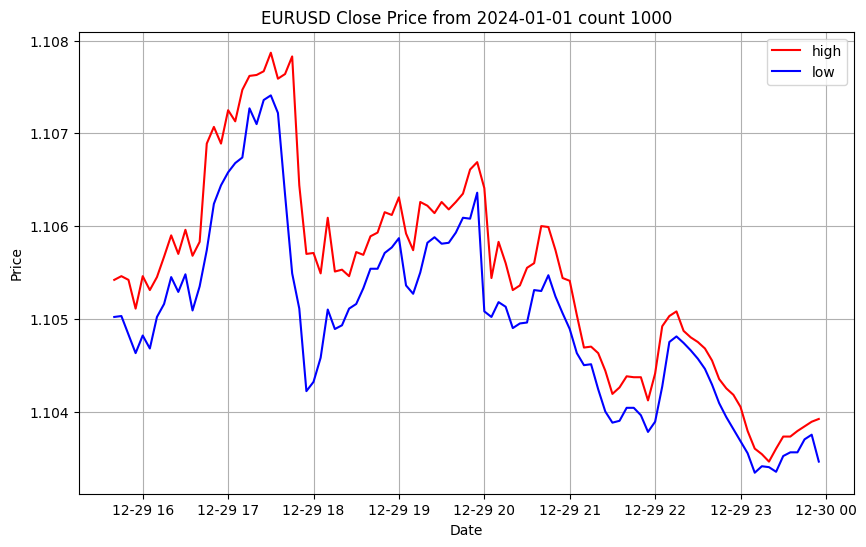

In [107]:

# พล็อตข้อมูลราคา
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['high'], label='high', color='red')
plt.plot(df.index, df['low'], label='low', color='blue')
plt.title('EURUSD Close Price from 2024-01-01 count 1000')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Index(['12:40:00', '12:45:00', '12:50:00', '12:55:00', '13:00:00', '13:05:00',
       '13:10:00', '13:15:00', '13:20:00', '13:25:00',
       ...
       '23:10:00', '23:15:00', '23:20:00', '23:25:00', '23:30:00', '23:35:00',
       '23:40:00', '23:45:00', '23:50:00', '23:55:00'],
      dtype='object', name='time', length=1000)

In [47]:
df

,open,high,low,close,tick_volume,spread,real_volume,time
time,,,,,,,,
2023-12-26 12:40:00,1.10179,1.10181,1.10169,1.10175,115,0,0,12:40:00
2023-12-26 12:45:00,1.10175,1.10179,1.10168,1.10178,109,0,0,12:45:00
2023-12-26 12:50:00,1.10178,1.10178,1.10162,1.10172,200,0,0,12:50:00
2023-12-26 12:55:00,1.10173,1.10174,1.10154,1.10164,153,0,0,12:55:00
2023-12-26 13:00:00,1.10164,1.10168,1.10145,1.10149,228,0,0,13:00:00
...,...,...,...,...,...,...,...,...
2023-12-29 23:35:00,1.10356,1.10373,1.10356,1.10372,124,15,0,23:35:00
2023-12-29 23:40:00,1.10373,1.10379,1.10356,1.10371,176,3,0,23:40:00
2023-12-29 23:45:00,1.10372,1.10384,1.10370,1.10378,281,15,0,23:45:00


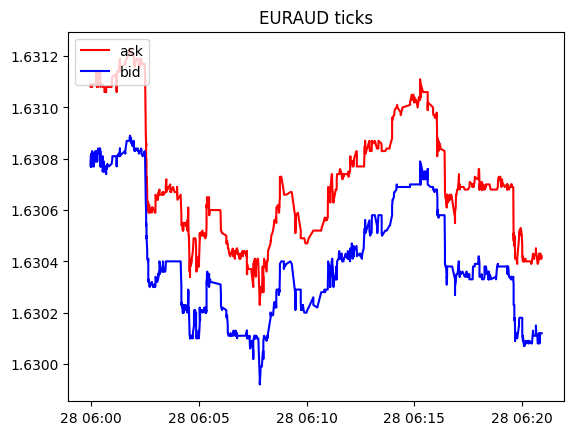

In [48]:
#PLOT
# create DataFrame out of the obtained data
ticks_frame = pd.DataFrame(euraud_ticks)
# convert time in seconds into the datetime format
ticks_frame['time']=pd.to_datetime(ticks_frame['time'], unit='s')
# display ticks on the chart
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')
 
# display the legends
plt.legend(loc='upper left')
 
# add the header
plt.title('EURAUD ticks')
 
# display the chart
plt.show()

In [28]:
mt5.account_info()

AccountInfo(login=79524542, trade_mode=0, leverage=100, limit_orders=200, margin_so_mode=0, trade_allowed=True, trade_expert=True, margin_mode=2, currency_digits=2, fifo_close=False, balance=100000.0, credit=0.0, profit=0.0, equity=100000.0, margin=0.0, margin_free=100000.0, margin_level=0.0, margin_so_call=50.0, margin_so_so=30.0, margin_initial=0.0, margin_maintenance=0.0, assets=0.0, liabilities=0.0, commission_blocked=0.0, name='Chanathip Parnsa-ard', server='MetaQuotes-Demo', currency='USD', company='MetaQuotes Software Corp.')

In [29]:
mt5.terminal_info()

TerminalInfo(community_account=True, community_connection=True, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4201, maxbars=100000, codepage=0, ping_last=0, community_balance=0.0, retransmission=0.05751053796033802, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='English', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Users\\parns\\AppData\\Roaming\\MetaQuotes\\Terminal\\D0E8209F77C8CF37AD8BF550E51FF075', commondata_path='C:\\Users\\parns\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')

In [34]:
symbols=mt5.symbols_get()
print('Symbols: ', len(symbols))

Symbols:  140


In [3]:
import time
i = 0
while True:
    i = i+1
    time.sleep(1)
    print(i)
    if i > 6 :
        break

1
2
3
4
5
6
7


In [ ]:
mt5.shutdown()